In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [83]:
data = pd.read_csv('spotify_dataset.csv', )
data.rename(columns = {"Song ID": "track_id", "Song Name": "track_name", "Artist": "artist_name",
        'Genre' : "genre", 'Popularity' : "popularity", 'Danceability' : "danceability", 'Energy' : "energy", 'Loudness' : "loudness",
       'Speechiness' : "speechiness", 'Acousticness' : "acousticness", 'Liveness' : "liveness", 'Tempo' : "tempo", 'Duration (ms)' : "duration_ms",
       'Valence' : 'valence'}, inplace = True)
data = data.drop(columns=['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Streams',
       'Artist Followers', 'Release Date',
       'Weeks Charted', 'Chord', 'genre'])
nan_value = float("NaN")
data.replace(" ", nan_value, inplace=True)
data.replace("", nan_value, inplace=True)
data.replace("[]", nan_value, inplace=True)
data.dropna(inplace = True)
data[['Index', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'tempo', 'duration_ms', 'valence']] = data[['Index', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'tempo', 'duration_ms', 'valence']].apply(pd.to_numeric)
data

,Index,track_name,artist_name,track_id,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence
0,1,Beggin',Måneskin,3Wrjm47oTz2sjIgck11l5e,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589
1,2,STAY (with Justin Bieber),The Kid LAROI,5HCyWlXZPP0y6Gqq8TgA20,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478
2,3,good 4 u,Olivia Rodrigo,4ZtFanR9U6ndgddUvNcjcG,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688
3,4,Bad Habits,Ed Sheeran,6PQ88X9TkUIAUIZJHW2upE,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591
4,5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,27NovPIUIRrOZoCHxABJwK,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,New Rules,Dua Lipa,2ekn2ttSfGqwhhate0LSR0,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608
1552,1553,Cheirosa - Ao Vivo,Jorge & Mateus,2PWjKmjyTZeDpmOUa3a5da,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714
1553,1554,Havana (feat. Young Thug),Camila Cabello,1rfofaqEpACxVEHIZBJe6W,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394
1554,1555,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",5F8ffc8KWKNawllr5WsW0r,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881


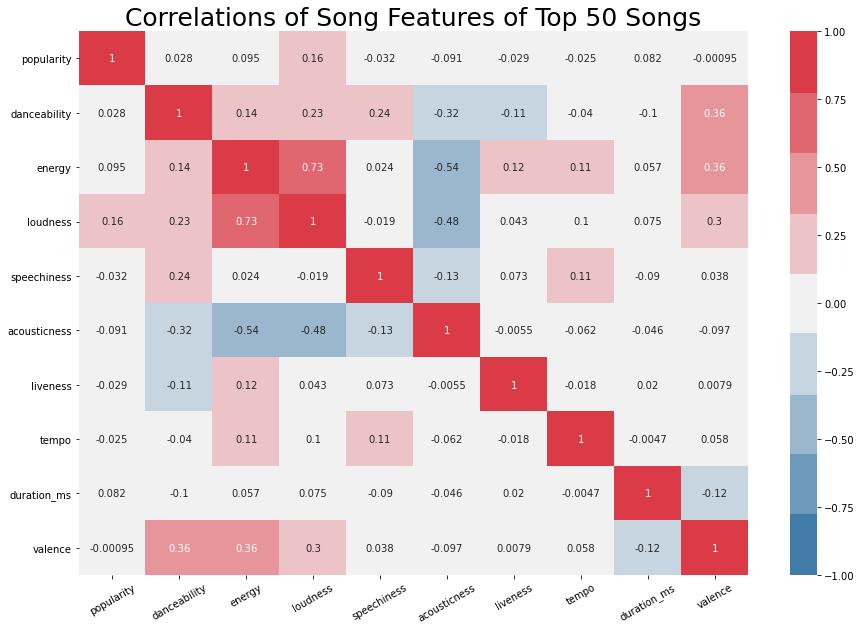

In [84]:
# data =pd.read_csv('spotify_top50_2021.csv', )
data.shape
data.columns
data.dropna(inplace = True)
data1 = data[data.columns[2:]]
data1
data1 = data1.sort_values('popularity', ascending = False)
corr = data1.corr()
corr
plt.figure(figsize=(15, 10)) 
 
plot = sns.heatmap( 
    corr,  
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9), 
    square=False, annot=True) 
 
plot.set_xticklabels( 
    plot.get_xticklabels(), 
    rotation=30, 
     
) 
plt.title("Correlations of Song Features of Top 50 Songs", fontsize=25) 
plt.show()

In [ ]:
data

In [85]:
#Splitting data 

feature_names = ['danceability', 'loudness', 'energy']

X = data[feature_names]
y = data["popularity"]



train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

test_size = 0.5

X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5)


# train_size = 0.8

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(1236, 3)
(1236,)
(154, 3)
(154,)
(155, 3)
(155,)


(None, None)

In [86]:
X_valid.shape

(154, 3)

In [87]:
# Scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.fit_transform(X_valid)
# X_test = scaler.transform(X_test)


In [96]:
# KNN Regression

from sklearn.neighbors import KNeighborsRegressor

for i in range(1, 4):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    print('for n = {} r squared error = {}'.format(i,knnreg.score(X_train, y_train)))
    

# print(knnreg.predict(X_valid))
# print('R-squared test score: {:.3f}'
#      .format(knnreg.score(X_valid, y_valid)))

for n = 1 r squared error = 0.9996480384450841
for n = 2 r squared error = 0.5339359351548054
for n = 3 r squared error = 0.3623415261607552


In [97]:
knnreg = KNeighborsRegressor(n_neighbors = 2).fit(X_valid, y_valid)
y_predict = knnreg.predict(X_test)
knn_error = np.mean(np.power((y_predict - y_test), 2))
print("Mean squared error: {}".format(knn_error))

Mean squared error: 312.68225806451613


In [92]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)
lin_error = np.mean(np.power((y_predict - y_test), 2))
print("Mean squared error: {}".format(lin_error))


Mean squared error: 208.99183926052257


In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

In [94]:
X = data.iloc[:,[5, 9, 15] ].values
y = data.iloc[:,[4] ].values

train_size = 0.8

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)


lambda_R = np.array([10,1,0.1,0.01, 0.001])

n_splits = 3
kf = KFold(n_splits=n_splits, shuffle = True)
errors = np.empty(0)
for i in lambda_R:
    for train_index, test_index in kf.split(X):
        X_train1, X_test = X[train_index], X[test_index]
        y_train1, y_test = y[train_index], y[test_index]
        ridge = Ridge(alpha = i).fit(X_train1, y_train1)
        y_hat = ridge.predict(X_test)
        errors = np.append(errors, np.mean(np.power((y_hat - y_test),2)))
    print('for lambda = {} validation error = {}'.format(i, errors.mean()))
    errors = np.empty(0)

IndexError: positional indexers are out-of-bounds

In [68]:
ridge = Ridge(alpha = 1.0).fit(X_valid, y_valid)
y_predict = ridge.predict(X_test)
ridge_error = np.mean(np.power((y_predict - y_test), 2))
print("Mean squared error: {}".format(ridge_error))

Mean squared error: 38.36343692938084


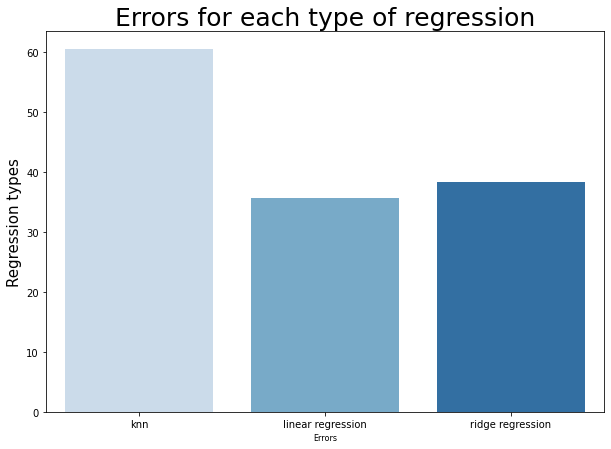

In [78]:
plt.figure(figsize=(10, 7))
errors = [knn_error, lin_error, ridge_error]
# sns.countplot(artists)
xlabels = ['knn', 'linear regression', 'ridge regression']
sns.barplot(x = xlabels,
            y = errors,
            palette = "Blues",
            )
plt.xlabel('Errors', fontsize = 8)
plt.ylabel('Regression types', fontsize = 15)
plt.title('Errors for each type of regression', fontsize = 25)
plt.show()

In [81]:
data = pd.read_csv('spotify_dataset.csv', )
data.rename(columns = {"Song ID": "track_id", "Song Name": "track_name", "Artist": "artist_name",
        'Genre' : "genre", 'Popularity' : "popularity", 'Danceability' : "danceability", 'Energy' : "energy", 'Loudness' : "loudness",
       'Speechiness' : "speechiness", 'Acousticness' : "acousticness", 'Liveness' : "liveness", 'Tempo' : "tempo", 'Duration (ms)' : "duration_ms",
       'Valence' : 'valence'}, inplace = True)
data = data.drop(columns=['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Streams',
       'Artist Followers', 'Release Date',
       'Weeks Charted', 'Chord', 'genre'])
nan_value = float("NaN")
data.replace(" ", nan_value, inplace=True)
data.replace("", nan_value, inplace=True)
data.replace("[]", nan_value, inplace=True)
data.dropna(inplace = True)
data[['Index', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'tempo', 'duration_ms', 'valence']] = data[['Index', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'tempo', 'duration_ms', 'valence']].apply(pd.to_numeric)
data




,Index,track_name,artist_name,track_id,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence
0,1,Beggin',Måneskin,3Wrjm47oTz2sjIgck11l5e,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589
1,2,STAY (with Justin Bieber),The Kid LAROI,5HCyWlXZPP0y6Gqq8TgA20,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478
2,3,good 4 u,Olivia Rodrigo,4ZtFanR9U6ndgddUvNcjcG,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688
3,4,Bad Habits,Ed Sheeran,6PQ88X9TkUIAUIZJHW2upE,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591
4,5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,27NovPIUIRrOZoCHxABJwK,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,New Rules,Dua Lipa,2ekn2ttSfGqwhhate0LSR0,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608
1552,1553,Cheirosa - Ao Vivo,Jorge & Mateus,2PWjKmjyTZeDpmOUa3a5da,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714
1553,1554,Havana (feat. Young Thug),Camila Cabello,1rfofaqEpACxVEHIZBJe6W,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394
1554,1555,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",5F8ffc8KWKNawllr5WsW0r,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881


In [82]:
#Splitting data 

feature_names = ['danceability', 'mode', 'tempo']

X = data[feature_names]
y = data["popularity"]



train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

test_size = 0.5

X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5)


# train_size = 0.8

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

KeyError: "['mode'] not in index"